<a href="https://colab.research.google.com/github/vicex99/IA-vendedor_ambulante_ciudades_madrid/blob/main/IA_Problema_del_Vendedor_Ambulante_Victor_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema del Viajante

https://es.wikipedia.org/wiki/Problema_del_viajante


Dada una lista de ciudades y las distancias entre ellas, las capitales de todas las provincias españolas, por ejemplo, ¿cual es la ruta mas corta que visita cada ciudad y regresa a la ciudad original?

Cuaderno adaptado de:

https://colab.research.google.com/github/Albina1810/tsp/blob/master/TSP.ipynb

Por Prof. Hector Barrio Crespo.


Universidad Europea, 2021
Revisado Octubre 2022

# Intercambio par a par
El intercambio par a par o técnica 2-opt involucra en cada iteración la eliminación de dos aristas y el reemplazo de estas con dos aristas diferentes que reconecten los fragmentos creados por la eliminación de las aristas produciendo un camino nuevo más corto. Esto es un caso especial del método k-opt. 

Note que la etiqueta Lin–Kernighan es un nombre erróneo para el 2-opt muchas veces utilizado. Lin–Kernighan es realmente el método más general de k-opt (https://en.wikipedia.org/wiki/2-opt).

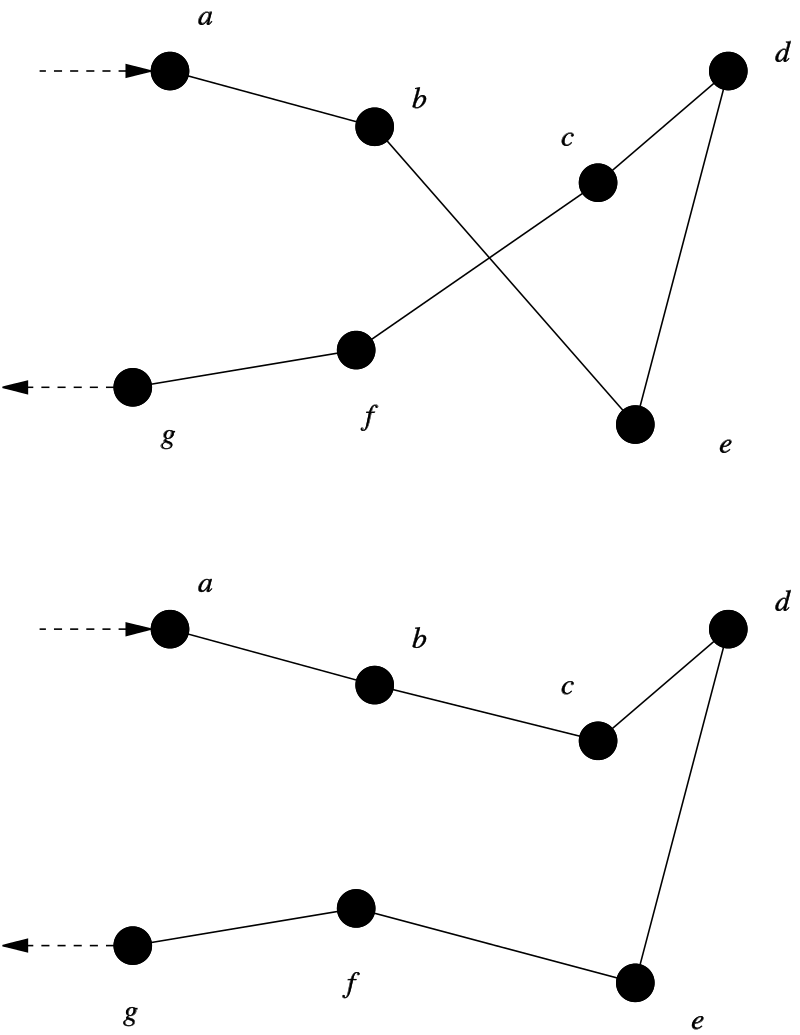

In [ ]:
import numpy as np
import pandas as pd
from math import radians, cos, sin
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Calculamos la distancia euclidiana en espacio de la ruta r por la ciudad c,
# terminando al inicio:
distancia_ruta = lambda r, c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) 
                                    for p in range(len(r))])

# Invertir el orden de los elementos desde i a k en r:
inversion = lambda r, i, k: np.concatenate((r[0:i],
                                            r[k:-len(r)+i-1:-1],
                                            r[k+1:len(r)]))

def two_opt(ciudades, umbral_mejora):
    # Vector de filas con las ciudades:
    ruta = np.arange(ciudades.shape[0])
    # Inicializar el factor de mejora:
    f_mejora = 1
    # Calcular la distancia de la primera ruta:
    mejor_dist = distancia_ruta(ruta, ciudades)
    
    # Si la ruta mejora seguimos optimizando:
    while f_mejora > umbral_mejora:
        # Guardamos la mejor distancia obtenida:
        dist_a_mejorar = mejor_dist 
        
        # Para cada ciudad, excluyendo la primera y la ultima:
        for cambiar_primera in range(1, len(ruta)-2):
            # Para cada ciudad subsiguiente:
            for cambiar_ultima in range(cambiar_primera + 1, len(ruta)):
                # Invertimos el orden de las ciudades:
                nueva_ruta = inversion(ruta, cambiar_primera, cambiar_ultima)
                # Comprobamos la distancia con este cambio:
                nueva_distancia = distancia_ruta(nueva_ruta, ciudades)

                # Si ha mejorado la distancia:                
                if nueva_distancia < mejor_dist: 
                    # Esta es nuestra nueva mejor ruta:
                    ruta = nueva_ruta
                    # Esta es nuestra mejor distancia:
                    mejor_dist = nueva_distancia
        # Calculamos cuanto ha mejorado la ruta:
        f_mejora = 1 - mejor_dist/dist_a_mejorar
        # Si la ruta no mejora de manera sustancial, devolvemos la ruta:
    return ruta

# **Importar csv con Longitud y Latitud de las ciudades**

Importamos un archivo csv con longitud y latitud de ciudades, en mi caso usamos las ciudades de la comunidad de Madrid extraidas desde 
https://www.coordenadas.com.es/espana/pueblos-de-madrid/28/1.

In [ ]:
!wget https://raw.githubusercontent.com/Hbarrio-UEM/Inteligencia-Artificial/main/ciudades_madrid.csv

--2022-10-23 18:06:55--  https://raw.githubusercontent.com/Hbarrio-UEM/Inteligencia-Artificial/main/ciudades_guipuzcoa.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3908 (3.8K) [text/plain]
Saving to: ‘ciudades_guipuzcoa.csv’

ciudades_guipuzcoa. 100%[===================>]   3.82K  --.-KB/s    in 0s      

2022-10-23 18:06:55 (50.9 MB/s) - ‘ciudades_guipuzcoa.csv’ saved [3908/3908]



In [ ]:
ciudades = pd.read_csv("/content/ciudades_guipuzcoa.csv", header=None)
ciudades.head(10)

,0,1
0,- Abaltzisketa,"43.0511556605488,-2.1103793483"
1,- Aduna,"43.2148106751035,-2.0547512862"
2,- Aia,"43.2451125458756,-2.1524271053"
3,- Aizarnazabal,"43.2654082683414,-2.2328314208"
4,- Albiztur,"43.1286481892164,-2.1438702256"
5,- Alegia,"43.0984291963537,-2.0950335216"
6,- Alkiza,"43.1738208651163,-2.1072950636"
7,- Altzaga,"43.0670640008816,-2.1520475691"
8,- Altzo,"43.318996,-1.969857"
9,- Amezketa,"43.0577010454371,-2.0683647756"


In [ ]:
ciudades[1].str.split(',')

0     [43.0511556605488, -2.1103793483]
1     [43.2148106751035, -2.0547512862]
2     [43.2451125458756, -2.1524271053]
3     [43.2654082683414, -2.2328314208]
4     [43.1286481892164, -2.1438702256]
                    ...                
83    [43.0106766715273, -2.2848024333]
84    [43.2418186051628, -2.2379868639]
85    [43.2132231675484, -2.0774848895]
86    [43.2876451846902, -2.2461133898]
87    [43.1030792391374, -2.3156108273]
Name: 1, Length: 88, dtype: object

In [ ]:
ciudades[['Lon', 'Lat']] = ciudades[1].str.split(',', 1, expand=True)

In [ ]:
ciudades.tail()

,0,1,Lon,Lat
83,- Zerain,"43.0106766715273,-2.2848024333",43.0106766715273,-2.2848024333
84,- Zestoa,"43.2418186051628,-2.2379868639",43.2418186051628,-2.2379868639
85,- Zizurkil,"43.2132231675484,-2.0774848895",43.2132231675484,-2.0774848895
86,- Zumaia,"43.2876451846902,-2.2461133898",43.2876451846902,-2.2461133898
87,- Zumarraga,"43.1030792391374,-2.3156108273",43.1030792391374,-2.3156108273


In [ ]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       88 non-null     object
 1   1       88 non-null     object
 2   Lon     88 non-null     object
 3   Lat     88 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


In [ ]:
# Por defecto, el tipo de datos en el dataframe es "object".
# Pasando los datos a tipo "numeric" mejoramos la manera de trabajar con ellos.
ciudades['Lon'] = ciudades['Lon'].apply(pd.to_numeric)
ciudades['Lat'] = ciudades['Lat'].apply(pd.to_numeric)

In [ ]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       88 non-null     object 
 1   1       88 non-null     object 
 2   Lon     88 non-null     float64
 3   Lat     88 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.9+ KB


# **Convertidor de Latitud y Longitud a Coordenadas Cartesianas**

** R de la tierra =6371 KM**
 
 
 x = R * cos( radiance(lat) ) * cos(radiance (lon))
 
 
 y = R * cos( radiance(lat) ) * sin(radiance (lon))
 
 
 http://www.geomidpoint.com/example.html
 
 
 


In [ ]:
R = 6371
lat = ciudades["Lat"].map(radians)
lon = ciudades["Lon"].map(radians)
x = lon.map(cos) * lat.map(cos) * R
y = lon.map(cos) * lat.map(sin) * R

ciudades["lat_rads"] = lat
ciudades["lon_rads"] = lon
ciudades["x"] = x
ciudades["y"] = y
ciudades.head()

,0,1,Lon,Lat,lat_rads,lon_rads,x,y
0,- Abaltzisketa,"43.0511556605488,-2.1103793483",43.051156,-2.110379,-0.036833,0.751384,4652.415507,-171.440274
1,- Aduna,"43.2148106751035,-2.0547512862",43.214811,-2.054751,-0.035862,0.754241,4640.146173,-166.477110
2,- Aia,"43.2451125458756,-2.1524271053",43.245113,-2.152427,-0.037567,0.754770,4637.549448,-174.300544
3,- Aizarnazabal,"43.2654082683414,-2.2328314208",43.265408,-2.232831,-0.038970,0.755124,4635.754997,-180.748086
4,- Albiztur,"43.1286481892164,-2.1438702256",43.128648,-2.143870,-0.037418,0.752737,4646.432113,-173.939495


In [ ]:
ciudades_d = ciudades.drop([1, "Lon","Lat", "lat_rads", "lon_rads"], 1)
ciudades_d.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,0,x,y
0,- Abaltzisketa,4652.415507,-171.440274
1,- Aduna,4640.146173,-166.477110
2,- Aia,4637.549448,-174.300544
3,- Aizarnazabal,4635.754997,-180.748086
4,- Albiztur,4646.432113,-173.939495


In [ ]:
ciudades_d.set_index(0, inplace=True)

In [ ]:
ciudades_d.head()

,x,y
0,,
- Abaltzisketa,4652.415507,-171.440274
- Aduna,4640.146173,-166.477110
- Aia,4637.549448,-174.300544
- Aizarnazabal,4635.754997,-180.748086
- Albiztur,4646.432113,-173.939495


In [ ]:
df = ciudades_d.copy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=['x1', 'x2'])

In [ ]:
df_escalado

,x1,x2
0,81.104268,57.247643
1,39.357176,64.834126
2,30.521673,52.875554
3,24.415954,43.020114
4,60.745438,53.427439
...,...,...
83,89.697704,35.412526
84,30.471609,42.275231
85,39.542176,62.013221
86,18.509929,41.479027


In [ ]:
%load_ext google.colab.data_table
df_escalado

,x1,x2
0,81.104268,57.247643
1,39.357176,64.834126
2,30.521673,52.875554
3,24.415954,43.020114
4,60.745438,53.427439
...,...,...
83,89.697704,35.412526
84,30.471609,42.275231
85,39.542176,62.013221
86,18.509929,41.479027


In [ ]:
ciudades_d = np.asarray(ciudades_d)

In [ ]:
escalado = np.asarray(df_escalado)
escalado

array([[ 81.10426786,  57.24764315],
       [ 39.35717616,  64.8341262 ],
       [ 30.52167314,  52.87555398],
       [ 24.41595447,  43.02011363],
       [ 60.74543776,  53.42743901],
       [ 69.05295342,  59.35296628],
       [ 49.4389783 ,  58.15441018],
       [ 76.56935115,  52.14522506],
       [ 13.17796288,  75.76079304],
       [ 79.83823012,  62.48992535],
       [ 38.49711992,  69.0425303 ],
       [ 50.77820175,  62.81870652],
       [ 64.61797845,  25.2833563 ],
       [ 78.04067035,  50.49266116],
       [ 82.35337588,  10.56365591],
       [ 70.93122359,  10.97927094],
       [ 41.50395   ,  59.16705773],
       [ 23.69513365,  80.10787934],
       [ 99.09829152,  51.47553685],
       [ 47.86975274,  30.43557713],
       [ 50.87477663,  40.20495413],
       [ 75.29556134,  54.98397289],
       [ 74.27528964,  44.00114756],
       [ 60.71253421,  44.92581751],
       [ 59.64457443,  66.05971419],
       [ 57.90294816,  75.6596844 ],
       [ 59.48621978,  19.80901763],
 

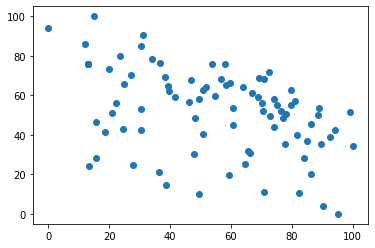

In [ ]:
# Mostramos las Ciudades.
plt.scatter(escalado[:, 0], escalado[:, 1]);


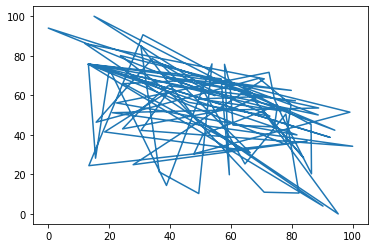

In [ ]:
# Mostramos la ruta inicial, estan organizadas en orden alfabetico.
plt.plot(escalado[:, 0], escalado[:, 1])
plt.show()

# Busqueda de Rutas

In [ ]:
#  Encontramos una buena ruta (la ruta da el orden de viaje por numero de fila)
ruta = two_opt(escalado, 0.001)
ruta

array([ 0,  9, 68, 21, 48,  5, 75, 41, 60, 69, 25, 32, 27, 24, 55, 46, 44,
       11, 50, 79,  6, 52, 36,  4, 57, 51,  7, 13, 67, 22, 23, 20, 19, 84,
        2, 16, 85,  1, 10, 53, 76, 43, 35, 64, 17, 59, 49, 45, 28, 74, 72,
        8, 38, 30, 78, 70, 81, 42, 86,  3, 29, 63, 61, 34, 31, 33, 26, 12,
       87, 77, 15, 14, 37, 58, 66, 56, 39, 71, 62, 83, 82, 73, 47, 65, 54,
       18, 80, 40])

In [ ]:
# Diagrama Cartesiano
# Reordenamos la matriz por ruta:
nuevo_orden = np.concatenate((np.array([escalado[ruta[i]] 
                                        for i in range(len(ruta))]),
                              np.array([escalado[0]])))

In [ ]:
nuevo_orden

array([[ 81.10426786,  57.24764315],
       [ 79.83823012,  62.48992535],
       [ 74.30880894,  58.05338487],
       [ 75.29556134,  54.98397289],
       [ 70.26079448,  56.09470235],
       [ 69.05295342,  59.35296628],
       [ 66.79459866,  61.25044546],
       [ 69.20826906,  68.6177258 ],
       [ 70.96082328,  68.32527388],
       [ 72.52832238,  71.6202723 ],
       [ 57.90294816,  75.6596844 ],
       [ 53.78094181,  75.89715781],
       [ 56.76436708,  68.37574833],
       [ 59.64457443,  66.05971419],
       [ 64.0890789 ,  64.07526268],
       [ 58.5004428 ,  65.31517851],
       [ 54.71424458,  59.8520904 ],
       [ 50.77820175,  62.81870652],
       [ 51.76343185,  63.97277341],
       [ 46.94979054,  67.67394184],
       [ 49.4389783 ,  58.15441018],
       [ 46.14121524,  56.45205473],
       [ 48.26246539,  48.32999839],
       [ 60.74543776,  53.42743901],
       [ 70.47039369,  52.10777085],
       [ 72.81507129,  49.46306074],
       [ 76.56935115,  52.14522506],
 

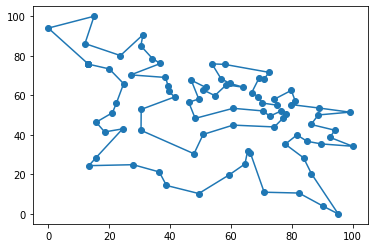

Ruta: [ 0  9 68 21 48  5 75 41 60 69 25 32 27 24 55 46 44 11 50 79  6 52 36  4
 57 51  7 13 67 22 23 20 19 84  2 16 85  1 10 53 76 43 35 64 17 59 49 45
 28 74 72  8 38 30 78 70 81 42 86  3 29 63 61 34 31 33 26 12 87 77 15 14
 37 58 66 56 39 71 62 83 82 73 47 65 54 18 80 40]

Distancia Escalada: 689.469335714509


In [ ]:
# Mostramos las Ciudades.
plt.scatter(escalado[:,0], escalado[:,1])
# Mostramos la Ruta.
plt.plot(nuevo_orden[:,0], nuevo_orden[:,1])
plt.show()
# Imprimimos la ruta y la distancia:
print("Ruta: " + str(ruta) + "\n\nDistancia Escalada: " 
      + str(distancia_ruta(ruta, escalado)))

In [ ]:
orden = pd.DataFrame(ruta, columns=["index"])
ciudades["index"] = ciudades.index
viaje = orden.merge(ciudades, on = "index")
viaje

,index,0,1,Lon,Lat,lat_rads,lon_rads,x,y
0,0,- Abaltzisketa,"43.0511556605488,-2.1103793483",43.051156,-2.110379,-0.036833,0.751384,4652.415507,-171.440274
1,9,- Amezketa,"43.0577010454371,-2.0683647756",43.057701,-2.068365,-0.036100,0.751499,4652.043422,-168.010713
2,68,- Orendain,"43.0776972095907,-2.1047991537",43.077697,-2.104799,-0.036736,0.751848,4650.418344,-170.913148
3,21,- Baliarrain,"43.072904235762,-2.12937296198",43.072904,-2.129373,-0.037165,0.751764,4650.708347,-172.921193
4,48,- Ikaztegieta,"43.0927276291788,-2.1211073159",43.092728,-2.121107,-0.037020,0.752110,4649.228645,-172.194541
...,...,...,...,...,...,...,...,...,...
83,65,- Olaberria,"43.0269847186225,-2.2062387371",43.026985,-2.206239,-0.038506,0.750963,4653.955143,-179.294425
84,54,- Lazkao,"43.0194888194631,-2.1671234871",43.019489,-2.167123,-0.037823,0.750832,4654.644751,-176.138681
85,18,- Ataun,"42.9796361314241,-2.1543730024",42.979636,-2.154373,-0.037601,0.750136,4657.703891,-175.216452
86,80,- Zaldibia,"43.0200985883723,-2.1387631971",43.020099,-2.138763,-0.037328,0.750842,4654.685139,-173.832975


In [ ]:
inicio = viaje[0:1]
ciclo = viaje.append(inicio)
ciclo

,index,0,1,Lon,Lat,lat_rads,lon_rads,x,y
0,0,- Abaltzisketa,"43.0511556605488,-2.1103793483",43.051156,-2.110379,-0.036833,0.751384,4652.415507,-171.440274
1,9,- Amezketa,"43.0577010454371,-2.0683647756",43.057701,-2.068365,-0.036100,0.751499,4652.043422,-168.010713
2,68,- Orendain,"43.0776972095907,-2.1047991537",43.077697,-2.104799,-0.036736,0.751848,4650.418344,-170.913148
3,21,- Baliarrain,"43.072904235762,-2.12937296198",43.072904,-2.129373,-0.037165,0.751764,4650.708347,-172.921193
4,48,- Ikaztegieta,"43.0927276291788,-2.1211073159",43.092728,-2.121107,-0.037020,0.752110,4649.228645,-172.194541
...,...,...,...,...,...,...,...,...,...
84,54,- Lazkao,"43.0194888194631,-2.1671234871",43.019489,-2.167123,-0.037823,0.750832,4654.644751,-176.138681
85,18,- Ataun,"42.9796361314241,-2.1543730024",42.979636,-2.154373,-0.037601,0.750136,4657.703891,-175.216452
86,80,- Zaldibia,"43.0200985883723,-2.1387631971",43.020099,-2.138763,-0.037328,0.750842,4654.685139,-173.832975
87,40,- Gaintza,"43.0557042304305,-2.1261370893",43.055704,-2.126137,-0.037108,0.751464,4652.023134,-172.706985


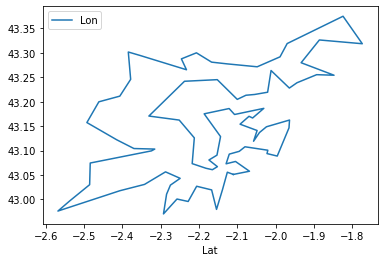

In [ ]:
# Dibujar Latitud y Longitud
ciclo.plot(kind="line", x="Lat", y="Lon");

# Representacion de las Rutas

In [ ]:
# Escribimos la ruta como puntos:
viajante = ciclo[["Lon", "Lat"]]

In [ ]:
viajante

,Lon,Lat
0,43.051156,-2.110379
1,43.057701,-2.068365
2,43.077697,-2.104799
3,43.072904,-2.129373
4,43.092728,-2.121107
...,...,...
84,43.019489,-2.167123
85,42.979636,-2.154373
86,43.020099,-2.138763
87,43.055704,-2.126137


In [ ]:
viajante.iloc[0]

Lon    43.051156
Lat    -2.110379
Name: 0, dtype: float64

In [ ]:
import folium

In [ ]:
mapa = folium.Map(location=viajante.iloc[0], zoom_start=10.2)
puntos_totales = len(viajante)
for i in range(0, puntos_totales):
  x = viajante.iloc[i]['Lon']
  y = viajante.iloc[i]['Lat']
  punto = [x, y]
  ciudad = ciclo.iloc[i][0]

  if i == 0 or i == puntos_totales - 1: 
    color = 'black'
  else:
    color = 'blue'

  icon = folium.Icon(color=color)
  # folium.Marker(punto, popup=ciudad, icon=icon).add_to(mapa)

  if i != 0:
    x_ant = viajante.iloc[i-1]['Lon']
    y_ant = viajante.iloc[i-1]['Lat']
    punto_anterior = [x_ant, y_ant]
    folium.PolyLine([punto, punto_anterior],
                  color='red',
                  weight=15,
                  opacity=0.8).add_to(mapa)

  
mapa